In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from xgboost import XGBClassifier

In [20]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/HR-Employee-Attrition.csv')

In [3]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [4]:
pd.set_option('display.max_columns',df.shape[1])

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()
# No missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Text(0, 0.5, 'in %')

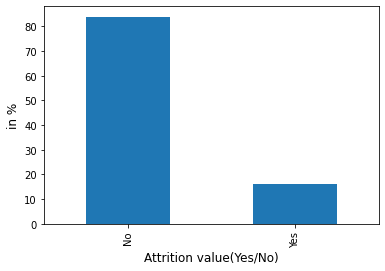

In [9]:
# Target variable distribution
(df['Attrition'].value_counts()/len(df) * 100).plot(kind = 'bar')
plt.xlabel('Attrition value(Yes/No)',fontsize = 12)
plt.ylabel('in %',fontsize = 12)

In [10]:
df['Attrition'].replace({'Yes':1,'No':0},inplace = True) # Encoding target variable

In [15]:
pd.set_option('display.max_columns',df.shape[1])
df.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,1,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,1
1,49,0,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,1,0
2,37,1,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,1
3,33,0,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1,0
4,27,0,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1


In [16]:
# Numerical variables:
# Although some of the variables appears to be in numeric in nature, they are originally categorical which is encoded
# Below df_num organises all the numeric variables
df_num = df[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','StandardHours','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [17]:
def plotting_graph(columns_list,df):
    a = len(columns_list)  # no of rows
    b = 2                  # no of columns
    c = 1                  # Counter variable

    fig = plt.figure(figsize = (15,45))

    for i in columns_list:
    plt.subplot(a,b,c)
    plt.xlabel(i)
    sns.kdeplot(df[i],shade = True)
    c+=1

    plt.subplot(a,b,c)
    plt.xlabel(i)
    sns.boxplot(x=df['Attrition'],y=df[i])
    c+=1

    print()

    plt.show()

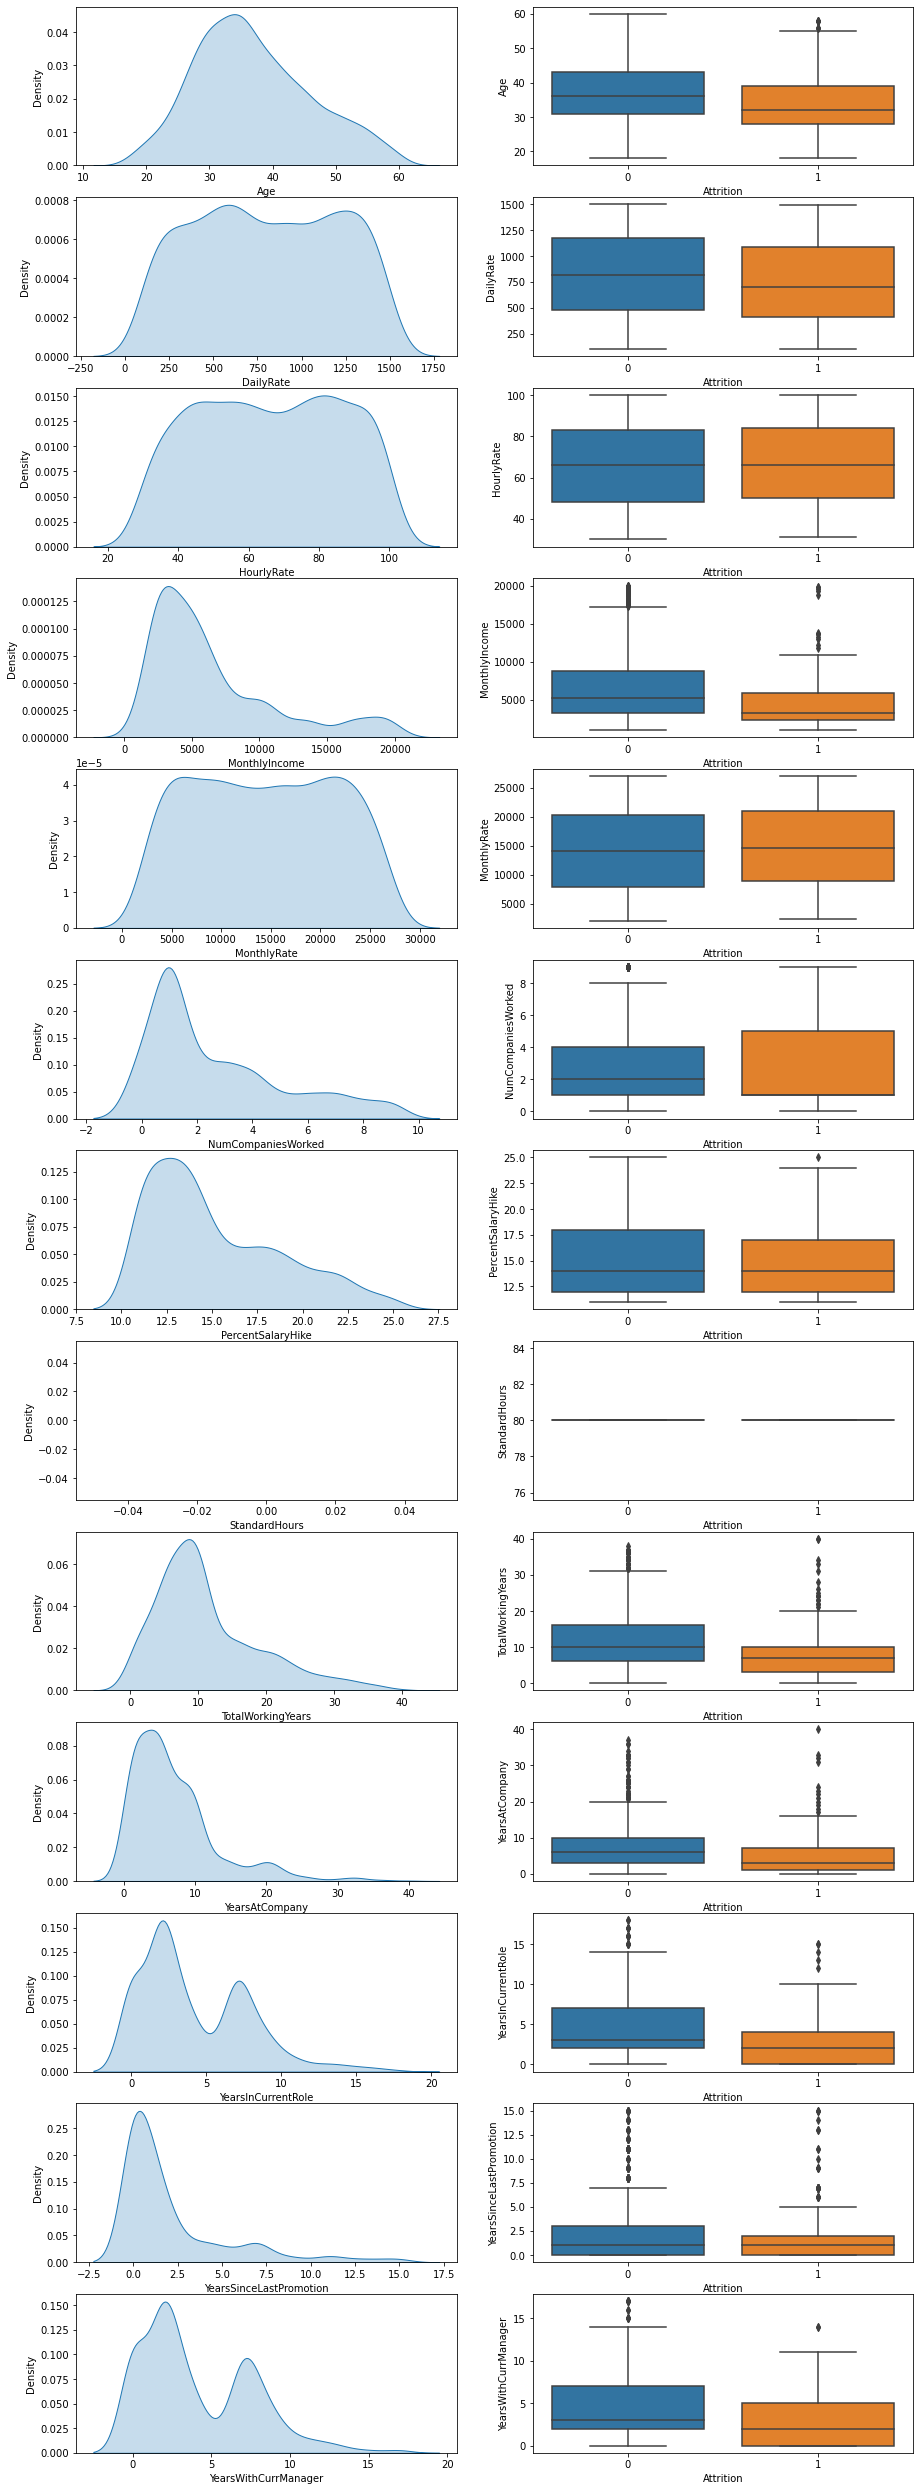

In [21]:
plotting_graph(df_num.columns,df)

# Observations:

-  `Age`: column normally distributed. Presence of outliers in the subclass 1 of attrition rate
-  `DailyRate`: near normal bimodal distributed. Absence of outliers
-  `HourlyRate`: near normal bimodal distributed. Absence of outliers
-  `MonthlyIncome`: Right skewed distribution. Presence of outliers in the bth subclass of attrition rate
-  `MonthlyRate`: near normal bimodal distributed. Absence of outliers
-  `NumCompaniesWorked`: Multimodal right skewed distribution. Presence of outliers in the subclass 0 of attrition rate
-  `PercentSalaryHike`: Multimodal right skewed distribution. Presence of outliers in the subclass 1 of attrition rate
-  `TotalWorkingYears`: Right skewed distribution. Presence of outliers in the both the subclasses of attrition rate
-  `YearsAtCompany`: Right skewed distribution. Presence of outliers in the both the subclasses of attrition rate
-  `YearsInCurrentRole`: Bimodal Right skewed distribution. Presence of outliers in the both the subclasses of attrition rate
-  `YearsSincePromotion`: Right skewed distribution. Presence of outliers in the both the subclasses of attrition rate
-  `YearsWithCurrentManager`: Bimodal Right skewed distribution. Presence of outliers in the both the subclasses of attrition rate
- `StandardHours`: There is no distribution observed. Might have variance as 0. Likely to drop from the analysis.

In [61]:
df['StandardHours'].std()

0.0

# EDA on categorical data

In [11]:
df.select_dtypes(include = object).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [37]:
df_cat = df[['Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']]

In [38]:
for variable in df_cat.columns:
    print(df[variable].value_counts(normalize = True)*100)  # Contribution in %
    print('-'*30)
    print()

Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64
------------------------------

Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: EducationField, dtype: float64
------------------------------

Male      60.0
Female    40.0
Name: Gender, dtype: float64
------------------------------

Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Human Resources               3.537415
Name: JobRole, dtype: float64
------------------------------

Married     45.782313
Single      31.972789
Divorced    22.244898
Name: Ma

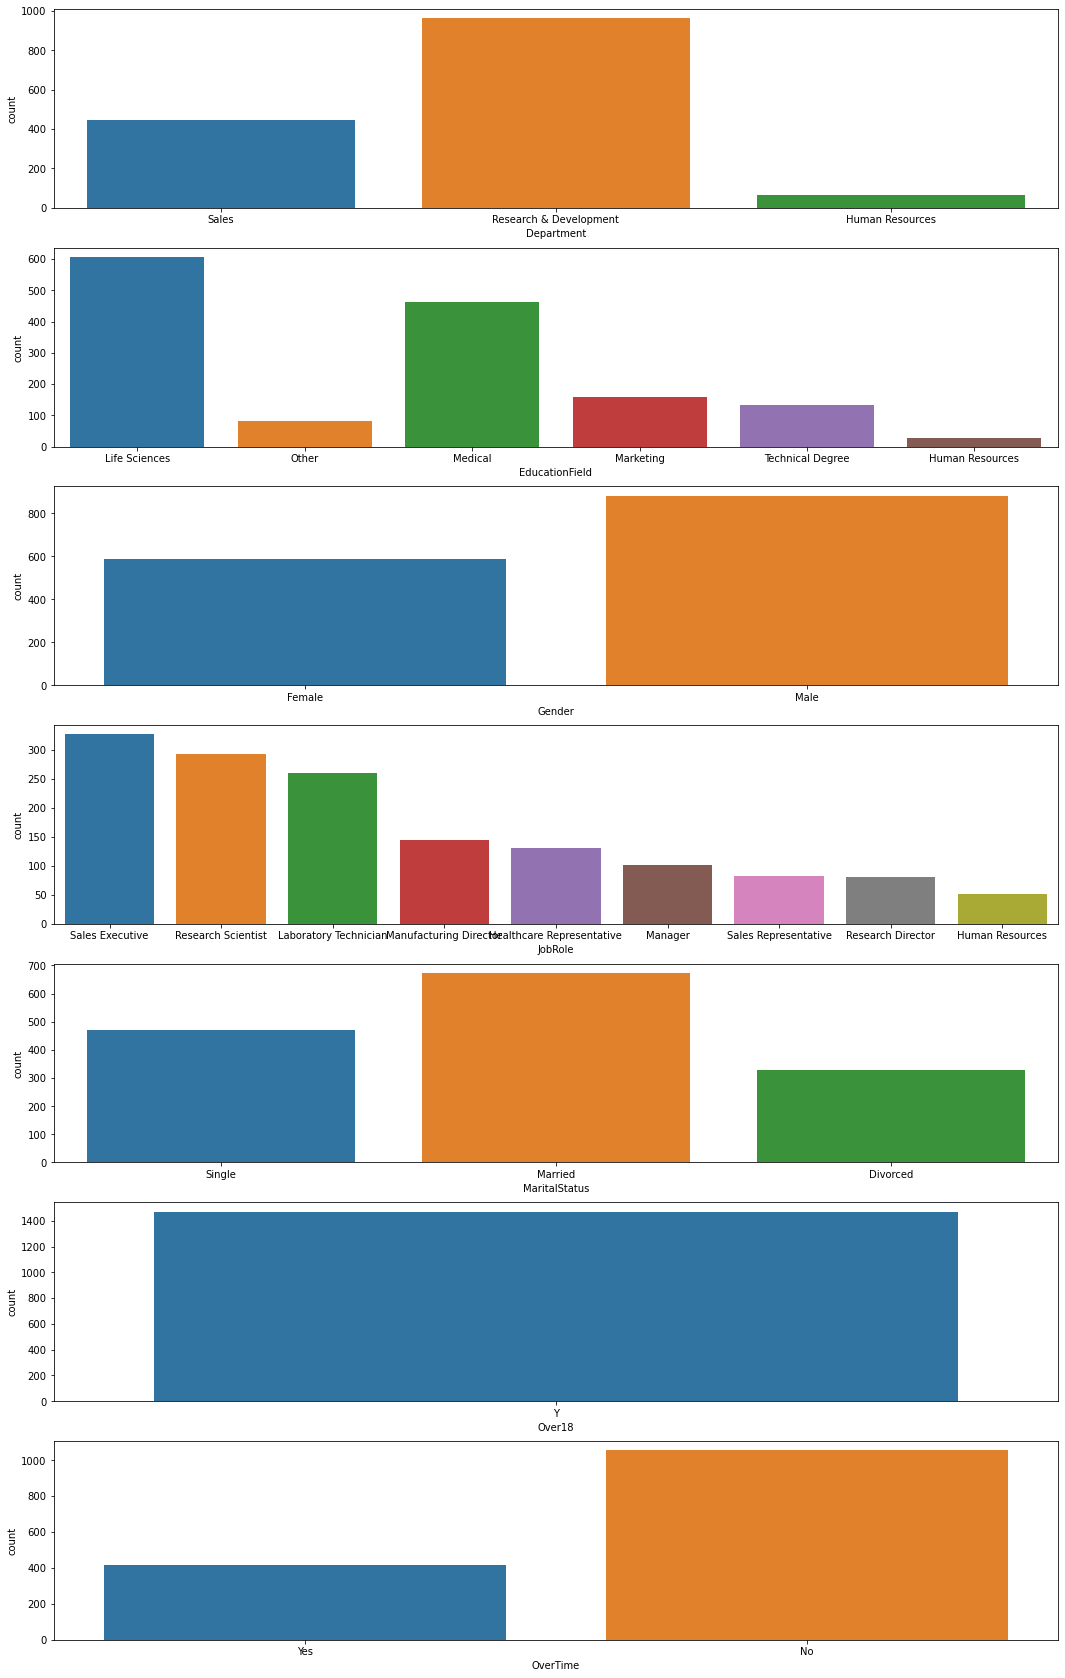

In [45]:
plt.figure(figsize = (18,30))
for count,variable in enumerate(df_cat.columns,start = 1):
    plt.subplot(7,1,count)
    sns.countplot(df[variable])
    
plt.show()

# Observations:
- There are more number of people working in Research & Development > Sales> Human Resource
- Ratio of Male employees more than female employees
- Most people are from the Life sciences and Medical as their education background
- Top 3 job roles - Sales executive, Research scientist, Laboratory Technician
- No of Married people are more than single and divorced employees
- All the observations are of 'Y' category in 'Over18' feature, therefore it does not add any significance to the analysis
- Most of the employees are not preferring 'Overtime'

In [46]:
df.drop('Over18',axis = 1,inplace = True)

# Numerical variable vs Target variable Analysis

In [50]:
df_num.columns

Index(['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

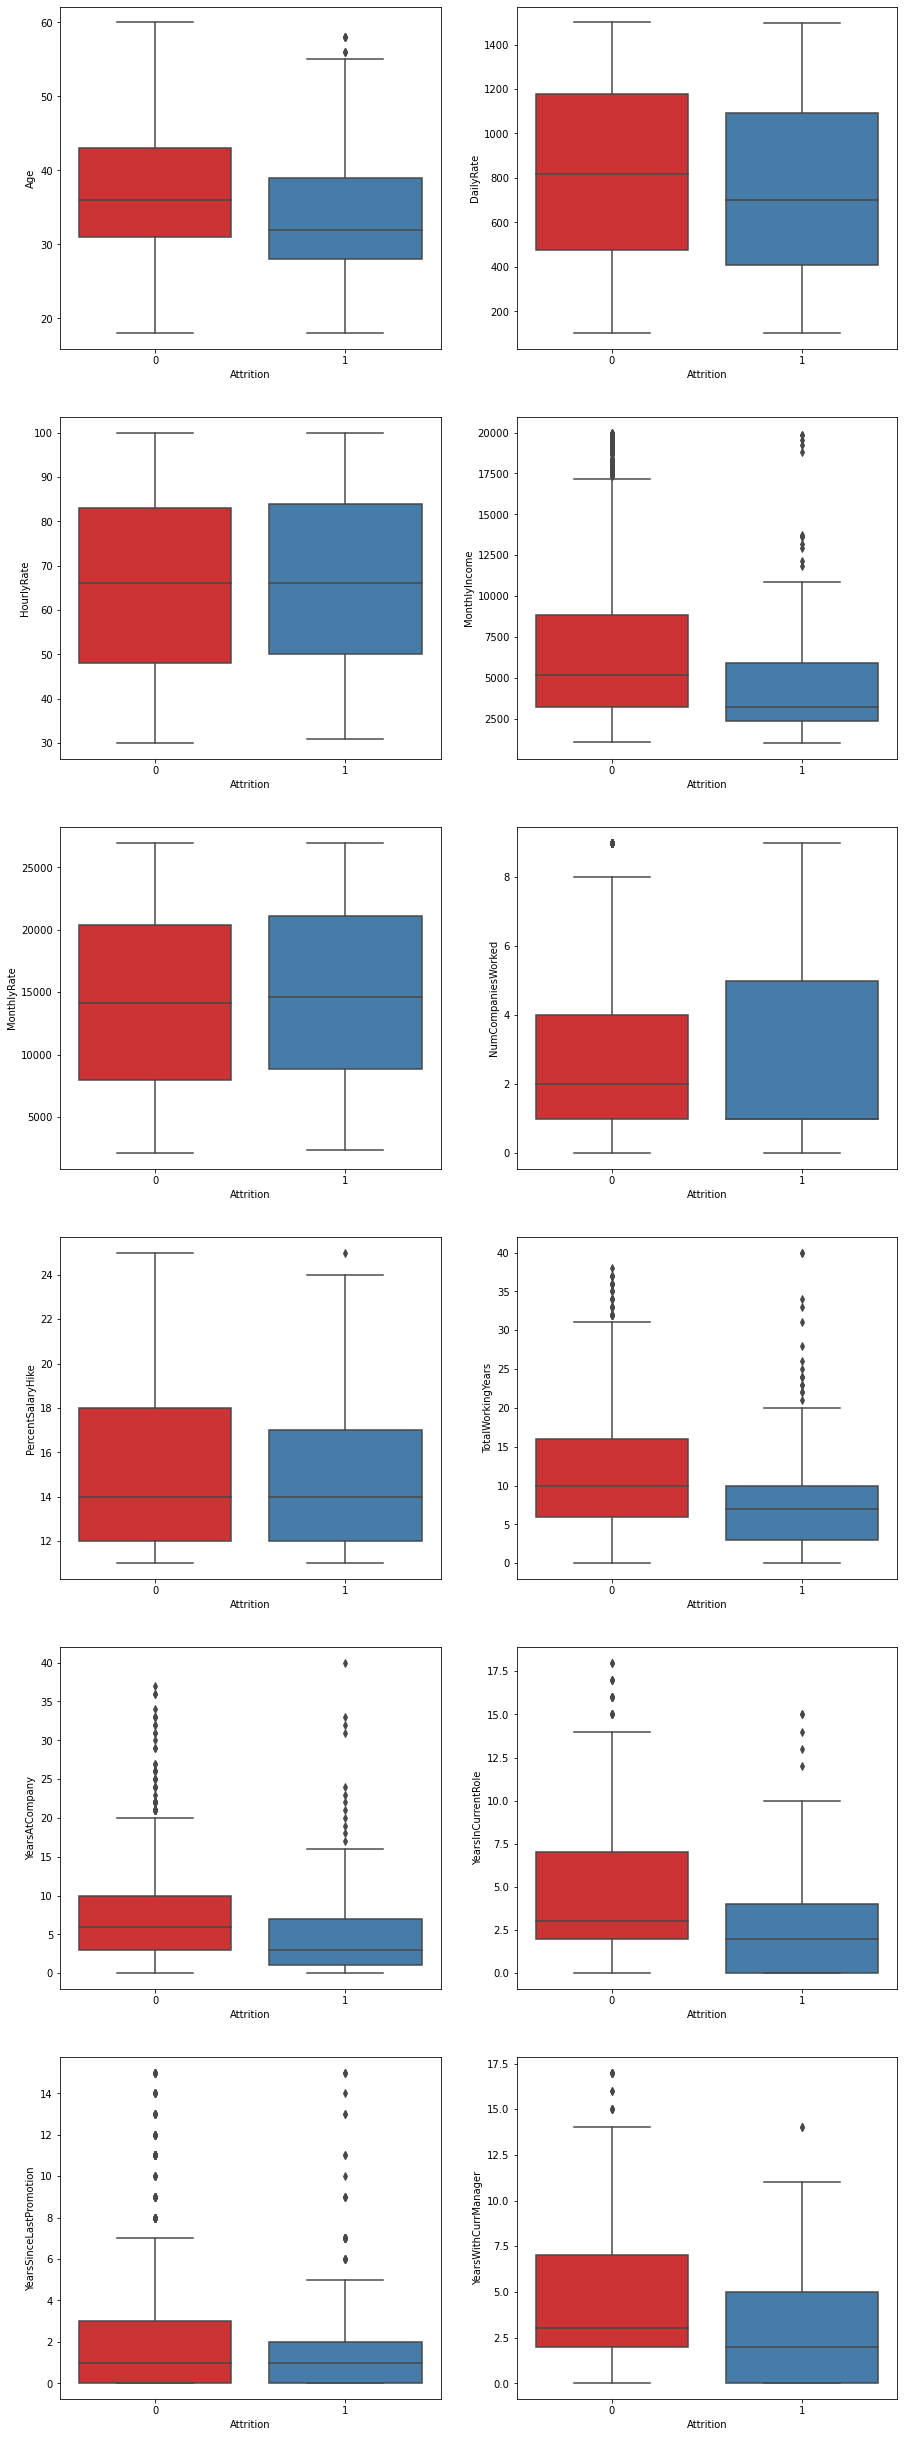

In [53]:
fig,ax = plt.subplots(6,2,figsize = (15,44))
sns.boxplot(x = df['Attrition'],y=df['Age'],palette='Set1',ax = ax[0,0])
sns.boxplot(x = df['Attrition'],y=df['DailyRate'],palette='Set1',ax = ax[0,1])
sns.boxplot(x = df['Attrition'],y=df['HourlyRate'],palette='Set1',ax = ax[1,0])
sns.boxplot(x = df['Attrition'],y=df['MonthlyIncome'],palette='Set1',ax = ax[1,1])
sns.boxplot(x = df['Attrition'],y=df['MonthlyRate'],palette='Set1',ax = ax[2,0])
sns.boxplot(x = df['Attrition'],y=df['NumCompaniesWorked'],palette='Set1',ax = ax[2,1])
sns.boxplot(x = df['Attrition'],y=df['PercentSalaryHike'],palette='Set1',ax = ax[3,0])
sns.boxplot(x = df['Attrition'],y=df['TotalWorkingYears'],palette='Set1',ax = ax[3,1])
sns.boxplot(x = df['Attrition'],y=df['YearsAtCompany'],palette='Set1',ax = ax[4,0])
sns.boxplot(x = df['Attrition'],y=df['YearsInCurrentRole'],palette='Set1',ax = ax[4,1])
sns.boxplot(x = df['Attrition'],y=df['YearsSinceLastPromotion'],palette='Set1',ax = ax[5,0])
sns.boxplot(x = df['Attrition'],y=df['YearsWithCurrManager'],palette='Set1',ax = ax[5,1])

# Observations:
- Since Medians of the two subclass in `HourlyRate`,`MonthlyRate`,`PercentSalaryHike`,`YearsSinceLastPromotion` are almost equal,they might not be a best predictor variables for the analysis

# Checking Correlation:

In [60]:
df['StandardHours'].std()

0.0

In [67]:
df['EmployeeCount'].std()

0.0

In [63]:
df.drop('StandardHours',axis = 1,inplace = True) # Dropping since there is no standard deviation observed

In [68]:
df.drop(['EmployeeCount'],axis = 1,inplace = True) # Dropping since there is no standard deviation observed

[Text(0, 0.5, 'Age'),
 Text(0, 1.5, 'Attrition'),
 Text(0, 2.5, 'DailyRate'),
 Text(0, 3.5, 'DistanceFromHome'),
 Text(0, 4.5, 'Education'),
 Text(0, 5.5, 'EmployeeNumber'),
 Text(0, 6.5, 'EnvironmentSatisfaction'),
 Text(0, 7.5, 'HourlyRate'),
 Text(0, 8.5, 'JobInvolvement'),
 Text(0, 9.5, 'JobLevel'),
 Text(0, 10.5, 'JobSatisfaction'),
 Text(0, 11.5, 'MonthlyIncome'),
 Text(0, 12.5, 'MonthlyRate'),
 Text(0, 13.5, 'NumCompaniesWorked'),
 Text(0, 14.5, 'PercentSalaryHike'),
 Text(0, 15.5, 'PerformanceRating'),
 Text(0, 16.5, 'RelationshipSatisfaction'),
 Text(0, 17.5, 'StockOptionLevel'),
 Text(0, 18.5, 'TotalWorkingYears'),
 Text(0, 19.5, 'TrainingTimesLastYear'),
 Text(0, 20.5, 'WorkLifeBalance'),
 Text(0, 21.5, 'YearsAtCompany'),
 Text(0, 22.5, 'YearsInCurrentRole'),
 Text(0, 23.5, 'YearsSinceLastPromotion'),
 Text(0, 24.5, 'YearsWithCurrManager'),
 Text(0, 25.5, 'BusinessTravel_Travel_Frequently'),
 Text(0, 26.5, 'BusinessTravel_Travel_Rarely')]

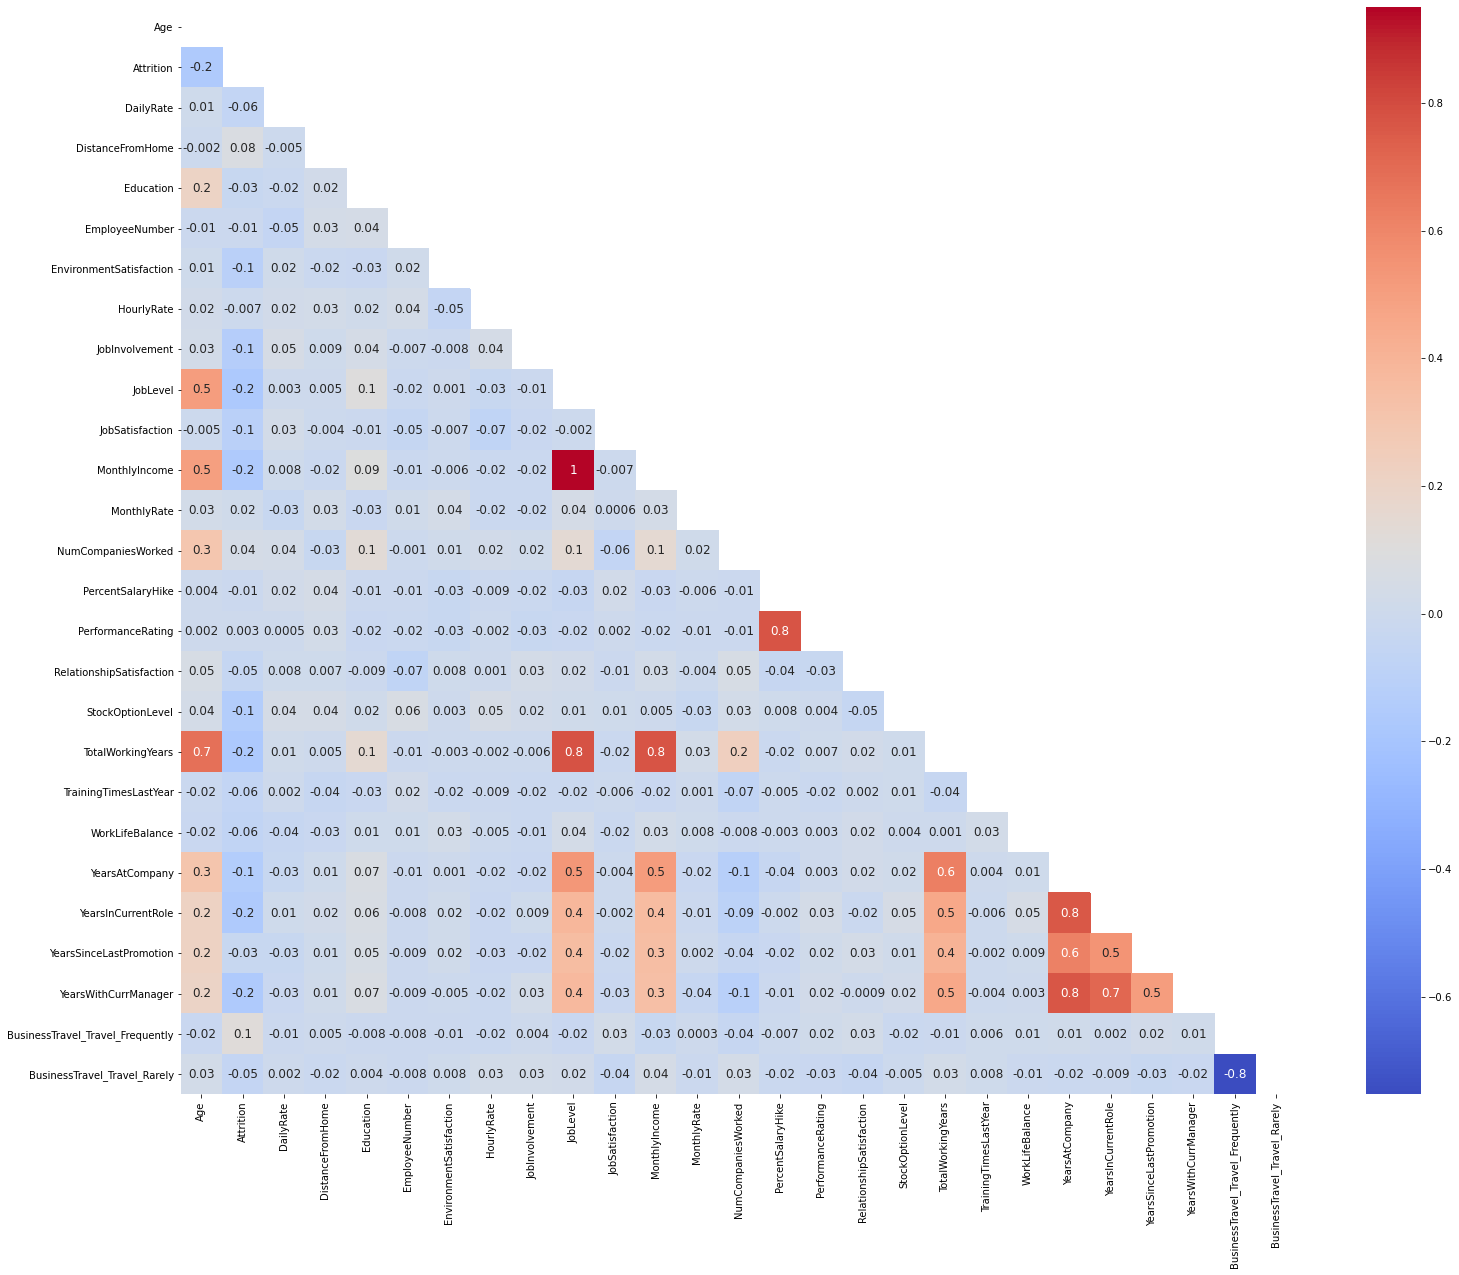

In [66]:
corr_mat = df.corr()
mask = np.zeros_like(corr_mat,dtype = bool)
mask[np.triu_indices_from(mask)] = True
fig,ax = plt.subplots(figsize = (25,20))
sns.heatmap(corr_mat,cmap = 'coolwarm',mask = mask,annot = True, annot_kws = {'size':12},fmt='.1g',)

ax.set_xticklabels(corr_mat.columns)
ax.set_yticklabels(corr_mat.columns,rotation = 0)


# Observations of Correlation heatmap

- `JobLevel` and `MonthlyIncome` are having perfect correlation which is not advised between independent variables. Therefore either of the feature can be dropped. JobLevel is dropped
- Also no feature is exhibiting  appreciable high correlation with the target variable. Therefore non-linear models can 
be best suited for the analysis.

In [72]:
df.drop('JobLevel',axis = 1,inplace = True)

# Summary of Exploratory Data Analysis

- There are no NA values in the dataset.

#### Numeric Features
-  `Age`: column normally distributed. Presence of outliers in the subclass 1 of attrition rate
-  `DailyRate`: near normal bimodal distributed. Absence of outliers
-  `HourlyRate`: near normal bimodal distributed. Absence of outliers
-  `MonthlyIncome`: Right skewed distribution. Presence of outliers in the bth subclass of attrition rate
-  `MonthlyRate`: near normal bimodal distributed. Absence of outliers
-  `NumCompaniesWorked`: Multimodal right skewed distribution. Presence of outliers in the subclass 0 of attrition rate
-  `PercentSalaryHike`: Multimodal right skewed distribution. Presence of outliers in the subclass 1 of attrition rate
-  `TotalWorkingYears`: Right skewed distribution. Presence of outliers in the both the subclasses of attrition rate
-  `YearsAtCompany`: Right skewed distribution. Presence of outliers in the both the subclasses of attrition rate
-  `YearsInCurrentRole`: Bimodal Right skewed distribution. Presence of outliers in the both the subclasses of attrition rate
-  `YearsSincePromotion`: Right skewed distribution. Presence of outliers in the both the subclasses of attrition rate
-  `YearsWithCurrentManager`: Bimodal Right skewed distribution. Presence of outliers in the both the subclasses of attrition rate
- `StandardHours`: There is no distribution observed. Might have variance as 0. Likely to drop from the analysis.
    
#### Categorical Features

- There are more number of people working in Research & Development > Sales> Human Resource
- Ratio of Male employees more than female employees
- Most people are from the Life sciences and Medical as their education background
- Top 3 job roles - Sales executive, Research scientist, Laboratory Technician
- No of Married people are more than single and divorced employees
- All the observations are of 'Y' category in 'Over18' feature, therefore it does not add any significance to the analysis
- Most of the employees are not preferring 'Overtime'


#### Other Observations
- `JobLevel` and `MonthlyIncome` are having perfect correlation which is not advised between independent variables. Therefore either of the feature can be dropped. JobLevel is dropped
- Also no feature is exhibiting  appreciable high correlation with the target variable. Therefore non-linear models can 
be best suited for the analysis.
- Since Medians of the two subclass in `HourlyRate`,`MonthlyRate`,`PercentSalaryHike`,`YearsSinceLastPromotion` are almost equal,they might not be a best predictor variables for the analysis

### Features which are dropped from the analysis

- Categorical Features: `Over18`(because there is no variance all the observations from a single class) and `JobLevel`
(high correlation with `MonthlyIncome`) 

- Numeric Features : `StandardHours`(stdev = 0), `EmployeeCount`(stdev = 0)

# Categorical Feature Encoding

In [76]:
df.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,1,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0,1
1,49,0,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1,0
2,37,1,1373,Research & Development,2,2,Other,4,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,0,1
3,33,0,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,1,0
4,27,0,591,Research & Development,2,1,Medical,7,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0,1


In [78]:
# Encoding 'Gender','Department','MaritalStatus','OverTime' with dummy encoding as no of subclass is less
df = pd.get_dummies(columns = ['Gender','Department','MaritalStatus','OverTime'],data = df,drop_first = True)

In [80]:
# Using label encoding for 'EducationField' and 'JobRole'
le = LabelEncoder()
df['EducationField'] = le.fit_transform(df['EducationField'])

In [81]:
le = LabelEncoder()
df['JobRole'] = le.fit_transform(df['JobRole'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EducationField                     1470 non-null   int32
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobRole                            1470 non-null   int32
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       